In [1]:
import pandas as pd # untuk memproses data 
import numpy as np # untuk melakukan perhitungan matematika
import matplotlib.pyplot as plt # untuk melakukan ploting data
from sklearn.metrics import r2_score , mean_squared_error # untuk proses evaluasi
from sklearn.model_selection import train_test_split # untuk membagi data
from sklearn.preprocessing import OneHotEncoder # mrubah str ke num
import seaborn as sns # untuk head map plot

# import Model
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# PREDIKSI HARGA RUMAH

### Dataset Review

In [2]:
#importing Dataset
import pandas as pd
house = pd.read_csv("datarumahku2 (1).csv")
#checking dataset
house.head()

,type,2016,2017,2018,2019,2020,2021,2022,harga_rata_rata,nama_rumah,tipe_rumah,Lokasi,kt,km,grs,lt,lb
0,Rumah,525000000,588000000,677000000,744000000,782000000,821000000,862000000,7.141429e+08,Adem Banget Hunian Rasa Villa Dengan View Gunu...,siap huni,Cijeruk,2.0,1.0,1.0,96,42.0
1,Rumah,799000000,895000000,1030000000,1133000000,1189000000,1249000000,1311000000,1.086571e+09,Akses Jalan 2 Mobil Rumah di Bpn Tonjong 2 Km ...,siap huni,Tajur Halang,3.0,1.0,0.0,120,80.0
2,Apartemen,570000000,639000000,735000000,808000000,848000000,891000000,935000000,7.751429e+08,Apartemen 2 BR di Podomoro Golf View,siap huni,Gunung Putri,2.0,1.0,0.0,35,36.0
3,Apartemen,253000000,284000000,326000000,359000000,377000000,396000000,415000000,3.442857e+08,Apartemen Cordova Edupartment Baru Dekat Kampu...,siap huni,Dramaga,1.0,1.0,0.0,16,18.0
4,Apartemen,350000000,392000000,451000000,496000000,521000000,547000000,575000000,4.760000e+08,Apartemen Furnish Di Sentul City,siap huni,Sentul City,1.0,1.0,0.0,38,NaN


In [3]:
#describe data 
house.describe()

,2016,2017,2018,2019,2020,2021,2022,harga_rata_rata,kt,km,grs,lt,lb
count,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1284.000000,1281.000000,1294.000000,1300.000000,1292.000000
mean,2.409282e+09,2.698907e+09,3.103545e+09,3.414385e+09,3.584555e+09,3.763455e+09,3.952086e+09,3.275173e+09,2.896417,2.124122,1.044822,296.782308,156.322755
std,5.720129e+09,6.412015e+09,7.366768e+09,8.111714e+09,8.508562e+09,8.929031e+09,9.380304e+09,7.775499e+09,1.395691,1.509673,1.199188,2012.115709,328.597303
min,3.500000e+07,4.000000e+07,4.600000e+07,5.000000e+07,5.300000e+07,5.500000e+07,5.800000e+07,4.814286e+07,1.000000,1.000000,0.000000,16.000000,17.000000
25%,5.560000e+08,6.230000e+08,7.170000e+08,7.880000e+08,8.280000e+08,8.690000e+08,9.120000e+08,7.561429e+08,2.000000,1.000000,0.000000,72.000000,50.000000
50%,1.000000e+09,1.120000e+09,1.288000e+09,1.417000e+09,1.488000e+09,1.563000e+09,1.641000e+09,1.359571e+09,3.000000,2.000000,1.000000,105.000000,80.000000
75%,1.980000e+09,2.218000e+09,2.551000e+09,2.806000e+09,2.946000e+09,3.093000e+09,3.248000e+09,2.691714e+09,3.000000,3.000000,1.000000,186.000000,176.000000
max,1.050000e+11,1.180000e+11,1.350000e+11,1.490000e+11,1.560000e+11,1.640000e+11,1.720000e+11,1.427143e+11,18.000000,18.000000,20.000000,70000.000000,10000.000000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             1300 non-null   object 
 1   2016             1300 non-null   int64  
 2   2017             1300 non-null   int64  
 3   2018             1300 non-null   int64  
 4   2019             1300 non-null   int64  
 5   2020             1300 non-null   int64  
 6   2021             1300 non-null   int64  
 7   2022             1300 non-null   int64  
 8   harga_rata_rata  1300 non-null   float64
 9   nama_rumah       1300 non-null   object 
 10  tipe_rumah       1300 non-null   object 
 11  Lokasi           1300 non-null   object 
 12  kt               1284 non-null   float64
 13  km               1281 non-null   float64
 14  grs              1294 non-null   float64
 15  lt               1300 non-null   int64  
 16  lb               1292 non-null   float64
dtypes: float64(5),

----------------------------------

# DATA PROCCESING

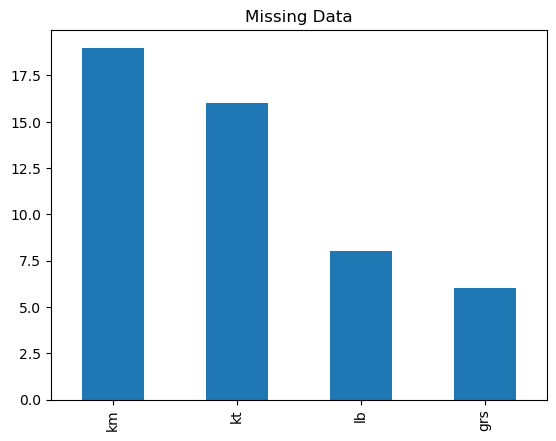

In [5]:
##checking missing values dengan melakukan ploting pada dataset
missing = house.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar() # melakukan ploting dengan bar plot 
plt.title('Missing Data');

Terlihat di atas kolom yang terdapat nan value adalah kolom `km , kt , lb , grs` , setelah di ketahui jumlah nan pada kolom nya dengan melakukan ploting , kita lakukan penggantian value `Nan` dengan `house['kt'].mean()` , kita akan mengganti nan nya dengan nilai rata rata dari kolom tersebut 

In [6]:
#imputer missing values
house['kt'] = house['kt'].fillna(house['kt'].mean()) 
house['km'] = house['km'].fillna(house['km'].mean())
house['grs'] = house['grs'].fillna(house['grs'].mean())
house['lt'] = house['lt'].fillna(house['lt'].mean())
house['lb'] = house['lb'].fillna(house['lb'].mean())

In [7]:
print("\n\nDuplicate Value ", house.duplicated().sum())



Duplicate Value  21


In [8]:
# Drop the duplicate values
house = house.drop_duplicates()

In [9]:
# Print the number of data after dropping the duplicates
print(house.shape)

(1279, 17)


In [10]:
# # Drop the last nan value
# house.dropna(axis=0, inplace=True)

# Categorical Data

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
# Tipe rumah 
encoder = OneHotEncoder()
 
tipe_rumah = encoder.fit_transform(house[['tipe_rumah']]).toarray()

one_hot_df = pd.DataFrame(tipe_rumah, columns=encoder.get_feature_names_out())
one_hot_df.head()

,tipe_rumah_butuh renovasi,tipe_rumah_siap huni,tipe_rumah_take over kredit
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [13]:
house.drop(['tipe_rumah'], axis=1, inplace=True)
house = pd.concat([house, one_hot_df], axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   type                         1279 non-null   object 
 1   2016                         1279 non-null   float64
 2   2017                         1279 non-null   float64
 3   2018                         1279 non-null   float64
 4   2019                         1279 non-null   float64
 5   2020                         1279 non-null   float64
 6   2021                         1279 non-null   float64
 7   2022                         1279 non-null   float64
 8   harga_rata_rata              1279 non-null   float64
 9   nama_rumah                   1279 non-null   object 
 10  Lokasi                       1279 non-null   object 
 11  kt                           1279 non-null   float64
 12  km                           1279 non-null   float64
 13  grs                    

In [14]:
# Tipe rumah 
encoder = OneHotEncoder()
 
lokasi = encoder.fit_transform(house[['Lokasi']]).toarray()

one_hot_df = pd.DataFrame(lokasi, columns=encoder.get_feature_names_out())
one_hot_df.head()

,Lokasi_ Barat,Lokasi_ Nirwana Residence,Lokasi_ Selatan,Lokasi_Ahmadyani,Lokasi_Babakan,Lokasi_Babakan Madang,Lokasi_Bantar Jati,Lokasi_Baranangsiang,Lokasi_Bojong Gede,Lokasi_Bojong Kulur,...,Lokasi_Tajur,Lokasi_Tajur Halang,Lokasi_Tamansari,Lokasi_Tanah Baru,Lokasi_Tanah Sareal,Lokasi_Tapos,Lokasi_Tegallega,Lokasi_Tenjo,Lokasi_Wanaherang,Lokasi_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
one_hot_df.shape

(1300, 86)

In [16]:
# house.drop(['Lokasi'], axis=1, inplace=True)
# house = pd.concat([house, one_hot_df], axis=1)
# house.info()

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   type                         1279 non-null   object 
 1   2016                         1279 non-null   float64
 2   2017                         1279 non-null   float64
 3   2018                         1279 non-null   float64
 4   2019                         1279 non-null   float64
 5   2020                         1279 non-null   float64
 6   2021                         1279 non-null   float64
 7   2022                         1279 non-null   float64
 8   harga_rata_rata              1279 non-null   float64
 9   nama_rumah                   1279 non-null   object 
 10  Lokasi                       1279 non-null   object 
 11  kt                           1279 non-null   float64
 12  km                           1279 non-null   float64
 13  grs                    

------------------------------------------------------- Pelatihan Model --------------------------------------------------------------------------------------------------------

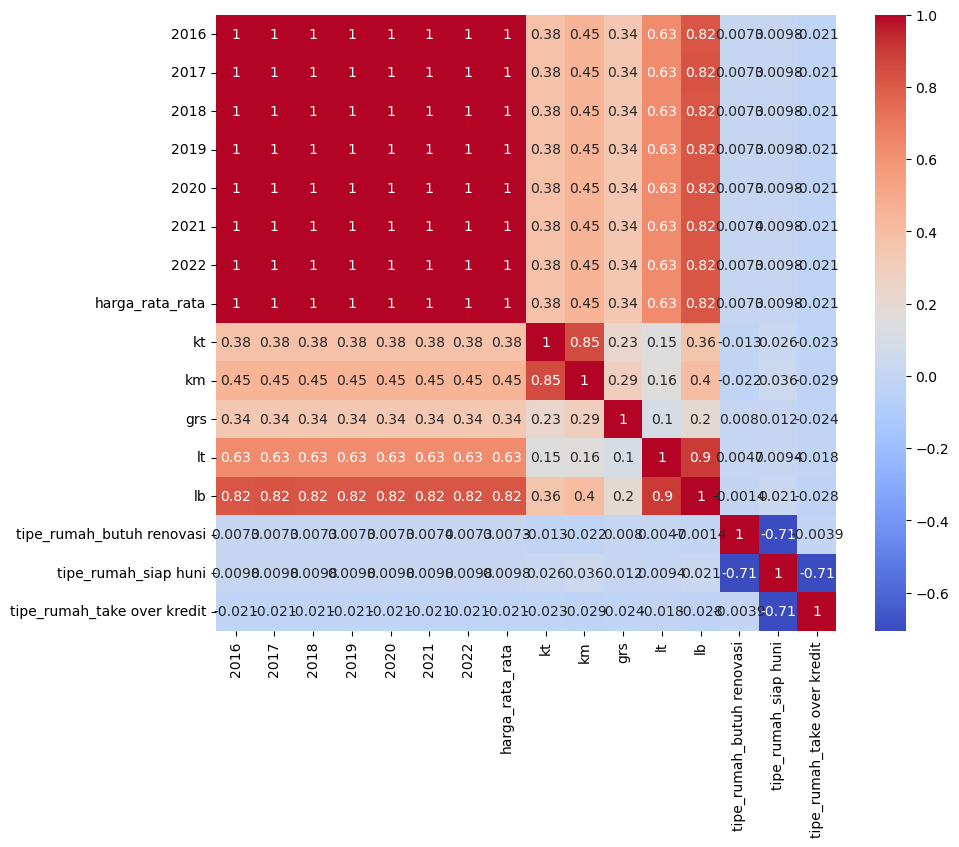

In [18]:
# Memilih hanya kolom-kolom numerik
numeric_columns = house.select_dtypes(include='number')

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [20]:
house['2022']

0       8.620000e+08
1       1.311000e+09
2       9.350000e+08
3       4.150000e+08
4       5.750000e+08
            ...     
943              NaN
1024             NaN
1120             NaN
1248             NaN
1252             NaN
Name: 2022, Length: 1300, dtype: float64

In [21]:
X = house.drop(['type', '2016', '2017','2018', '2019', '2020', '2021', '2022',
                'nama_rumah', 'harga_rata_rata', 'Lokasi' , 'tipe_rumah_butuh renovasi' , 'tipe_rumah_siap huni' , 'tipe_rumah_take over kredit'],axis=1).fillna(1)
print(X)
ss = StandardScaler()
X_s = ss.fit_transform(X)
y = np.array(house['2022'].fillna(1)).reshape((-1, 1))
print(y)
ss2 = StandardScaler()
y_s = ss2.fit_transform(y)
y_s = [v[0] for v in y_s]
X_s

       kt   km  grs     lt          lb
0     2.0  1.0  1.0   96.0   42.000000
1     3.0  1.0  0.0  120.0   80.000000
2     2.0  1.0  0.0   35.0   36.000000
3     1.0  1.0  0.0   16.0   18.000000
4     1.0  1.0  0.0   38.0  156.322755
...   ...  ...  ...    ...         ...
943   1.0  1.0  1.0    1.0    1.000000
1024  1.0  1.0  1.0    1.0    1.000000
1120  1.0  1.0  1.0    1.0    1.000000
1248  1.0  1.0  1.0    1.0    1.000000
1252  1.0  1.0  1.0    1.0    1.000000

[1300 rows x 5 columns]
[[8.620e+08]
 [1.311e+09]
 [9.350e+08]
 ...
 [1.000e+00]
 [1.000e+00]
 [1.000e+00]]


array([[-0.61343479, -0.73616984, -0.04479588, -0.09785873, -0.33958725],
       [ 0.10156092, -0.73616984, -0.88549945, -0.08592586, -0.22340509],
       [-0.61343479, -0.73616984, -0.88549945, -0.12818812, -0.3579318 ],
       ...,
       [-1.32843049, -0.73616984, -0.04479588, -0.14509302, -0.46494169],
       [-1.32843049, -0.73616984, -0.04479588, -0.14509302, -0.46494169],
       [-1.32843049, -0.73616984, -0.04479588, -0.14509302, -0.46494169]])

In [22]:
y_s

[-0.32136752494102,
 -0.27343591513540244,
 -0.3135746351507971,
 -0.3690856309167685,
 -0.3520053245272388,
 -0.3520053245272388,
 -0.3520053245272388,
 -0.28197606833016725,
 -0.3695126385765067,
 -0.34944327856880936,
 -0.31699069642870303,
 -0.3520053245272388,
 -0.3581969355934433,
 -0.3625737641057603,
 -0.26884558279321635,
 -0.1156565848621223,
 -0.1156565848621223,
 -0.15771683934633907,
 -0.20319315510846175,
 -0.23820778320699754,
 -0.33449801047797095,
 -0.3082370394040691,
 1.6176742579303336,
 -0.3144286504702736,
 -0.328413151326701,
 -0.24354537895372555,
 0.2695043242217713,
 0.33953358041884285,
 -0.15067121296065808,
 3.9638678443621,
 -0.23916855044140856,
 -0.30652900876511613,
 0.5321140349607897,
 -0.3520053245272388,
 0.812231059749076,
 -0.16817852700992597,
 -0.31699069642870303,
 -0.22070046915772965,
 -0.04744211121893825,
 -0.32136752494102,
 -0.2960673211015292,
 -0.22070046915772965,
 -0.1769321840345599,
 -0.14191755593602412,
 -0.2732224113055333,
 -0.2

In [23]:
X.columns 

Index(['kt', 'km', 'grs', 'lt', 'lb'], dtype='object')

In [24]:
# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X_s,
                                                 y_s,
                                                 test_size=0.25,
                                                 random_state=42)
X_train , y_train
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
LR = XGBRegressor()
LR.fit(X_train,y_train)
pred = LR.predict(X_train)
LRpd = pd.DataFrame(data={'pred' : pred , 'test' : y_train})
print(np.round(mean_squared_error(pred , y_train) , decimals=2))
print(LRpd)

0.0
         pred      test
0    0.142868  0.146953
1   -0.301991 -0.308237
2    0.968136  1.004812
3   -0.313286 -0.316991
4   -0.370940 -0.362787
..        ...       ...
970 -0.199089 -0.196254
971 -0.271636 -0.269806
972 -0.413213 -0.413388
973  0.229683  0.234490
974 -0.144945 -0.145440

[975 rows x 2 columns]


In [25]:
y_train_rans = ss2.inverse_transform(np.array(y_s).reshape((1, -1)))

tes = [format(v , '.0f') for v in y_train_rans[0]]
pre = [format(v , '.0f') for v in y_train_rans[0]]
LRpd = pd.DataFrame(data={'pred' : pre, 'test' : tes})
print(np.round(mean_squared_error(pred , y_train) , decimals=2))
print(LRpd)

0.0
            pred        test
0      862000000   862000000
1     1311000000  1311000000
2      935000000   935000000
3      415000000   415000000
4      575000000   575000000
...          ...         ...
1295           1           1
1296           1           1
1297           1           1
1298           1           1
1299           1           1

[1300 rows x 2 columns]


In [26]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [27]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [28]:
import os
import pickle
from sklearn.metrics import r2_score

# Define your models here...
# models = {...}

# Create a directory for the models if it doesn't exist
models_dir = "Models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Initialize lists for storing results
model_results_train = []
model_results_test = []
model_names = []
model_r2score_test = []
model_r2score_train = []

# Training the models and saving them
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model

    # Predicting and evaluating
    predicted_train = model.predict(X_train)
    predicted_test = model.predict(X_test)
    score_train = np.round(np.sqrt(mean_squared_error(y_train, predicted_train)), decimals=2)
    score_test = np.round(np.sqrt(mean_squared_error(y_test, predicted_test)), decimals=2)
    score_r2train = r2_score(y_train, predicted_train)
    score_r2test = r2_score(y_test, predicted_test)

    # Storing results
    model_results_train.append(score_train)
    model_results_test.append(score_test)
    model_r2score_train.append(score_r2train)
    model_r2score_test.append(score_r2test)
    model_names.append(name)

    # Save the trained model as a pickle file
    with open(os.path.join(models_dir, f"{name}.pkl"), "wb") as file:
        pickle.dump(model, file)

# Creating the DataFrame of results
df_results = pd.DataFrame({
    'Model': model_names,
    'RMSE TRAIN': model_results_train,
    'r2score train': model_r2score_train,
    'RMSE TEST': model_results_test,
    'r2score_test': model_r2score_test
}).sort_values(by='r2score_test', ascending=False)

df_results.head(8)

,Model,RMSE TRAIN,r2score train,RMSE TEST,r2score_test
7,RandomForestRegressor,0.18,0.973390,0.21,0.916826
1,XGBRegressor,0.03,0.999087,0.22,0.906954
0,SVR,0.84,0.391410,0.34,0.768318
2,Ridge,0.52,0.764214,0.43,0.632810
5,BayesianRidge,0.52,0.764227,0.43,0.631761
6,LinearRegression,0.52,0.764236,0.43,0.629779
3,ElasticNet,0.84,0.393000,0.60,0.300825
4,SGDRegressor,2.07,-2.669708,0.79,-0.237688


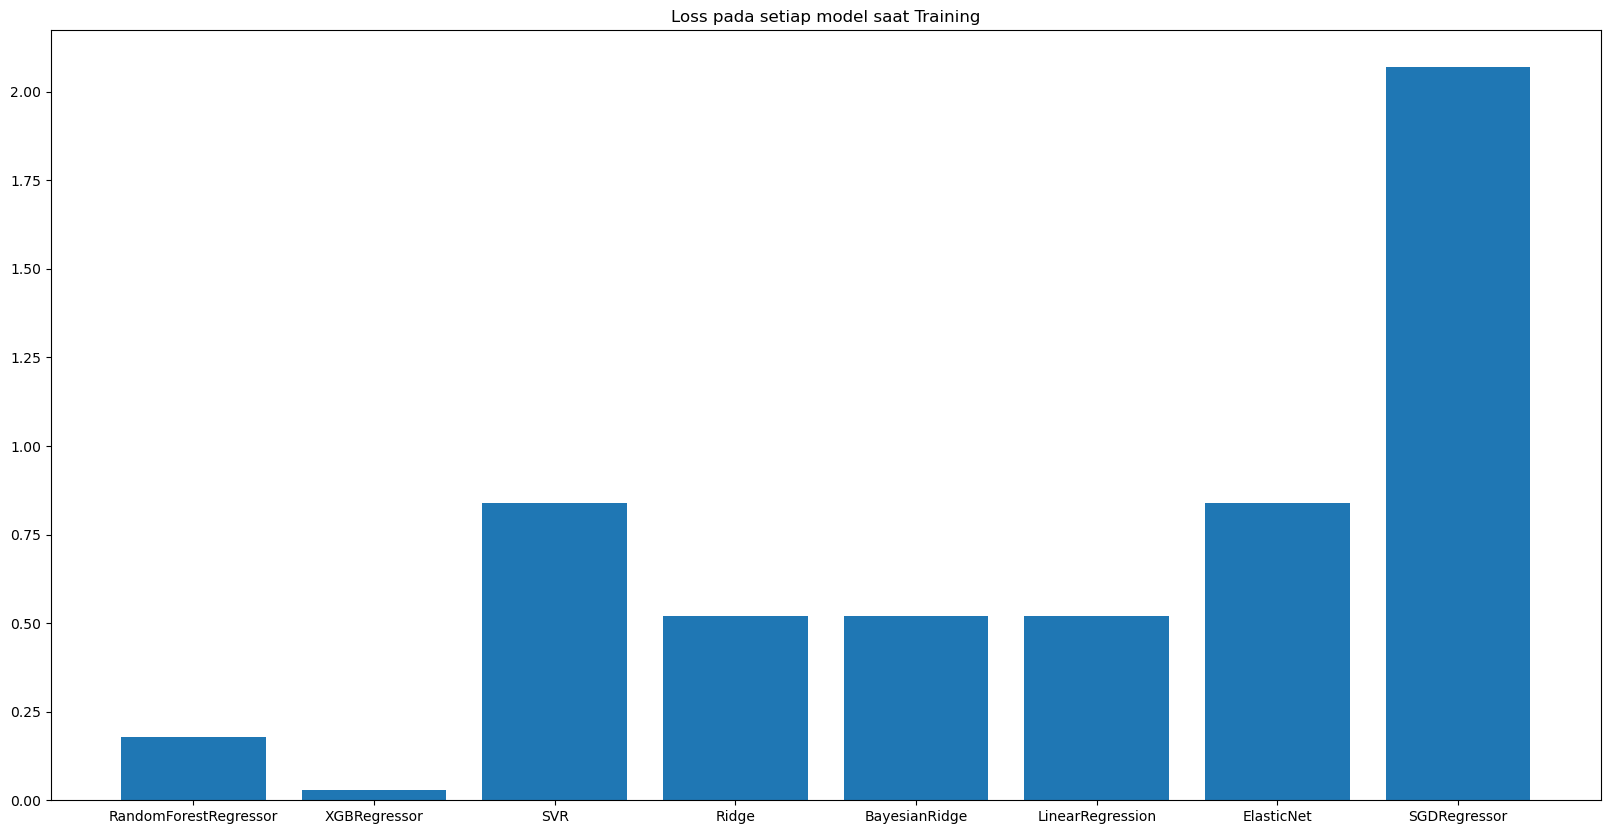

In [29]:
x_p = df_results['Model']
y_tr = df_results['RMSE TRAIN']
plt.figure(figsize=(20,10))
plt.title('Loss pada setiap model saat Training')
plt.bar(x_p , y_tr)
plt.show()

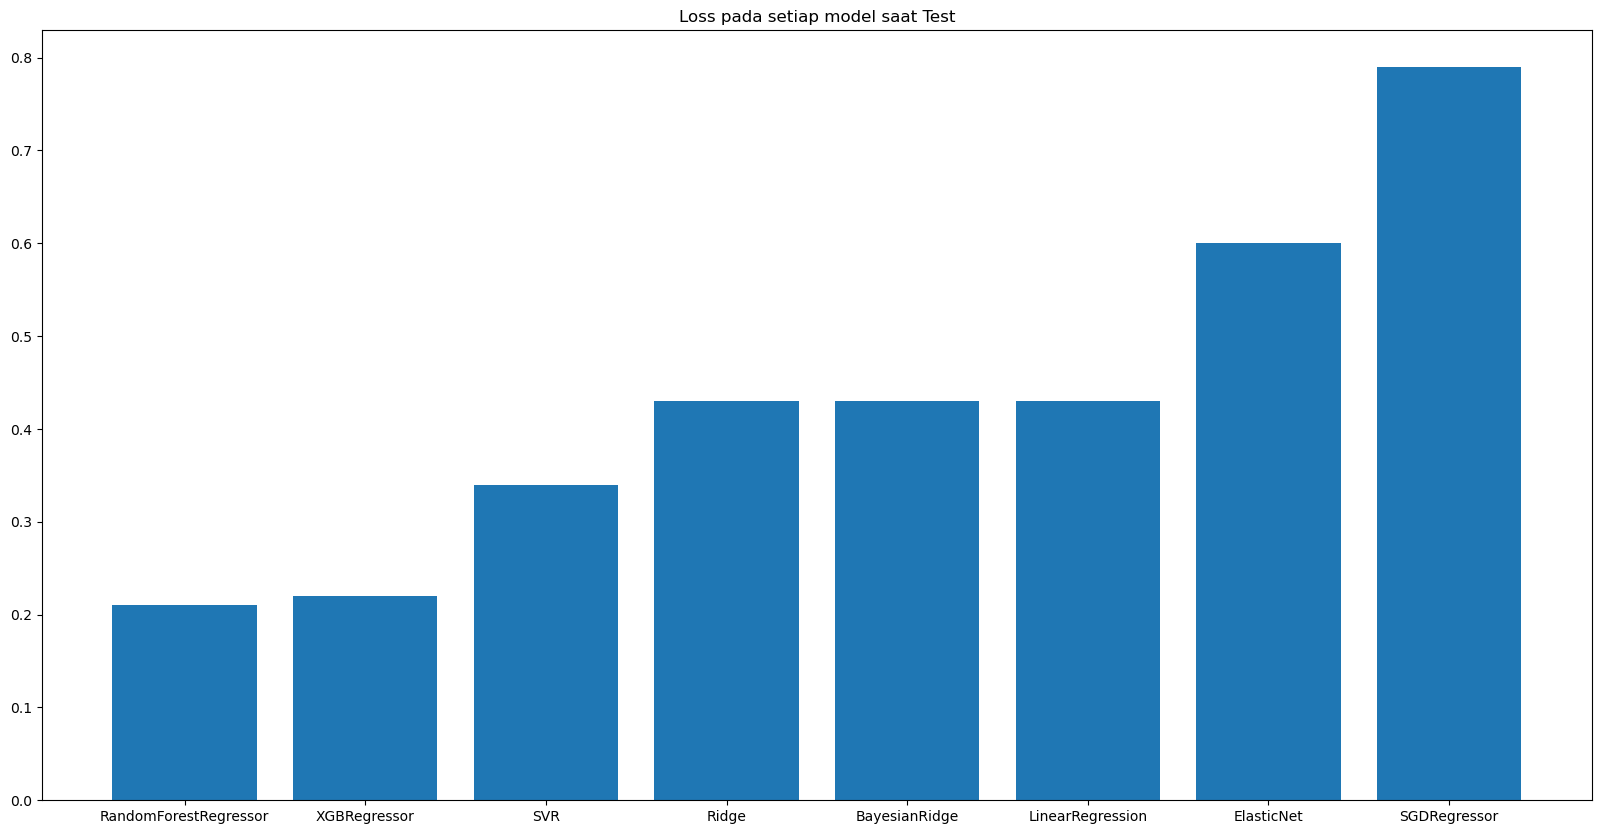

In [30]:
x_p = df_results['Model']
y_tr = df_results['RMSE TEST']
plt.figure(figsize=(20,10))
plt.title('Loss pada setiap model saat Test')
plt.bar(x_p , y_tr)
plt.show()